**STEP 1: IMPORT LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

**STEP 2: LOAD AND INSPECT DATA**

In [5]:
data = pd.read_csv('Wholesale-customers-data.csv')

In [7]:
print(data.head())
print(data.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

**STEP 3: DATA PREPROCESSING**

In [9]:
X = data.drop(['Channel', 'Region'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**STEP 4: ELBOW METHOD**

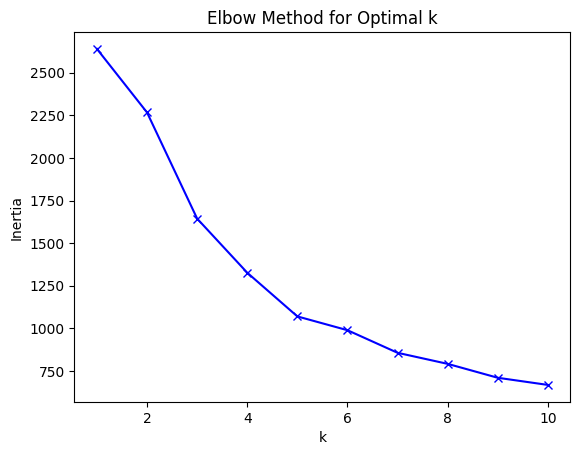

In [11]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

**STEP 5: K_MEANS CLUSTERING**

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

**STEP 6: HIERARCHICAL CLUSTERING**

In [16]:
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Agg_Cluster'] = hier.fit_predict(X_scaled)

**STEP 7: CLUSTER EVALUATION**

In [17]:
sil_score = silhouette_score(X_scaled, data['Cluster'])
print("Silhouette Score for K-means:", sil_score)

Silhouette Score for K-means: 0.4582633767207058


**STEP 8: ANALYZE CLUSTERS**

In [18]:
print(data.groupby('Cluster').mean())
print(data.groupby('Agg_Cluster').mean())

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  Agg_Cluster  
Cluster                                                           
0        2167.231429       1913.605714  1102.120000     1.342857  
1        9841.735849        981.471698  3664.245283     1.018868  
2        1932.621622      14758.837838  2459.351351     1.702703  
              Channel    Region         Fresh          Milk       Grocery  \
Agg_Cluster                                                                 
0            1.833333  2.833333  27477.000000  43542.166667  54588.500000   
1            1.085409  2.533808  15048.932384   3017.298932   3791.7